# CIFAR 10

This example is a copy of [Convolutional Neural Network (CNN)](https://www.tensorflow.org/tutorials/images/cnn) exmample of Tensorflow.
**It does NOT work with a Complex database** but uses this library Layers to test it's correct behaviour.

## Import stuff

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, models
import cvnn.layers as complex_layers   # Ouw layers!

## Download and prepare the CIFAR10 dataset

The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images.astype(dtype=np.float32) / 255.0, test_images.astype(dtype=np.float32) / 255.0

## Verify the data

To verify that the dataset looks correct, let's plot the first 25 images from the training set and display the class name below each image.

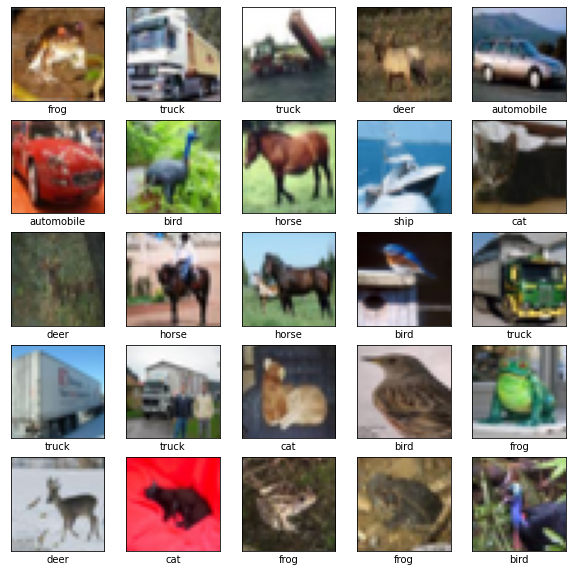

In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

## Create the convolutional base

By default, complex layers have complex dtype. A difference with Tensorflow example is that we must spicitly tell the layer to be real (`float32`)

The 6 lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.

As input, a CNN takes tensors of shape (image_height, image_width, color_channels), ignoring the batch size. If you are new to these dimensions, color_channels refers to (R,G,B). In this example, you will configure our CNN to process inputs of shape (32, 32, 3), which is the format of CIFAR images. You can do this by passing the argument input_shape to our first layer.

In [4]:
model = models.Sequential()
model.add(complex_layers.ComplexConv2D(32, (3, 3), activation='cart_relu', input_shape=(32, 32, 3), dtype=np.float32))
model.add(complex_layers.ComplexMaxPooling2D((2, 2), dtype=np.float32))
model.add(complex_layers.ComplexConv2D(64, (3, 3), activation='relu', dtype=np.float32)) # Either tensorflow ' relu' or 'cart_relu' will work
model.add(complex_layers.ComplexMaxPooling2D((2, 2), dtype=np.float32))
model.add(complex_layers.ComplexConv2D(64, (3, 3), activation='cart_relu', dtype=np.float32))

Let's display the architecture of our model so far.

In [5]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
complex_conv2d (ComplexConv2 (None, 30, 30, 32)        896       
_________________________________________________________________
complex_max_pooling2d (Compl (None, 15, 15, 32)        0         
_________________________________________________________________
complex_conv2d_1 (ComplexCon (None, 13, 13, 64)        18496     
_________________________________________________________________
complex_max_pooling2d_1 (Com (None, 6, 6, 64)          0         
_________________________________________________________________
complex_conv2d_2 (ComplexCon (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


Above, you can see that the output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels). The width and height dimensions tend to shrink as you go deeper in the network. The number of output channels for each Conv2D layer is controlled by the first argument (e.g., 32 or 64). Typically, as the width and height shrink, you can afford (computationally) to add more output channels in each Conv2D layer.

## Add Dense layers on top

To complete our model, you will feed the last output tensor from the convolutional base (of shape (4, 4, 64)) into one or more Dense layers to perform classification. Dense layers take vectors as input (which are 1D), while the current output is a 3D tensor. First, you will flatten (or unroll) the 3D output to 1D, then add one or more Dense layers on top. CIFAR has 10 output classes, so you use a final Dense layer with 10 outputs.

In [6]:
model.add(complex_layers.ComplexFlatten())
model.add(complex_layers.ComplexDense(64, activation='cart_relu', dtype=np.float32))
model.add(complex_layers.ComplexDense(10, dtype=np.float32))

Here's the complete architecture of our model.

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
complex_conv2d (ComplexConv2 (None, 30, 30, 32)        896       
_________________________________________________________________
complex_max_pooling2d (Compl (None, 15, 15, 32)        0         
_________________________________________________________________
complex_conv2d_1 (ComplexCon (None, 13, 13, 64)        18496     
_________________________________________________________________
complex_max_pooling2d_1 (Com (None, 6, 6, 64)          0         
_________________________________________________________________
complex_conv2d_2 (ComplexCon (None, 4, 4, 64)          36928     
_________________________________________________________________
complex_flatten (ComplexFlat (None, 1024)              0         
_________________________________________________________________
complex_dense (ComplexDense) (None, 64)                6

As you can see, our (4, 4, 64) outputs were flattened into vectors of shape (1024) before going through two Dense layers.

## Compile and train the model

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 89s 2ms/sample - loss: 1.5220 - accuracy: 0.4453 - val_loss: 1.2444 - val_accuracy: 0.5544
Epoch 2/10
50000/50000 [==============================] - 83s 2ms/sample - loss: 1.1728 - accuracy: 0.5838 - val_loss: 1.1218 - val_accuracy: 0.6003
Epoch 3/10
50000/50000 [==============================] - 85s 2ms/sample - loss: 1.0263 - accuracy: 0.6379 - val_loss: 1.0076 - val_accuracy: 0.6484
Epoch 4/10
50000/50000 [==============================] - 86s 2ms/sample - loss: 0.9268 - accuracy: 0.6726 - val_loss: 0.9924 - val_accuracy: 0.6514
Epoch 5/10
50000/50000 [==============================] - 84s 2ms/sample - loss: 0.8519 - accuracy: 0.7002 - val_loss: 0.9939 - val_accuracy: 0.6573
Epoch 6/10
50000/50000 [==============================] - 87s 2ms/sample - loss: 0.7950 - accuracy: 0.7213 - val_loss: 0.8890 - val_accuracy: 0.693250 - accuracy: 0.72
Epoch 7/10
50000/50000 [=============

## Evaluate the model

10000/10000 - 8s - loss: 0.8603 - accuracy: 0.7085


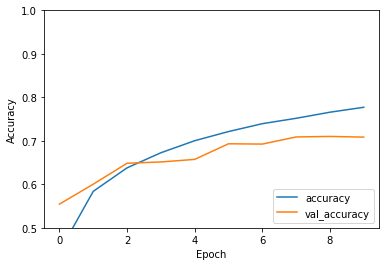

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [10]:
print(f"{test_acc:.2%}")

70.85%


Our simple CNN has achieved a test accuracy of over 70%. Not bad for a few lines of code!